In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error


# 1 读取数据
file_path = 'input/*.csv'
data = pd.read_csv(file_path)

FileNotFoundError: File b'input/*.csv' does not exist

In [ ]:
ls

In [ ]:
ls input

In [1]:
import pandas as pd

In [ ]:
pd

In [2]:
train = pd.read_csv('input/train.csv')

In [3]:
test = pd.read_csv('input/test.csv')

In [4]:
sample = pd.read_csv('input/sample_submission.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [8]:
ls input

data_description.txt*  test.csv*
sample_submission.csv* train.csv*


In [9]:
cat input/data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [10]:
f = open('input/data_description.txt')

In [11]:
f

<_io.TextIOWrapper name='input/data_description.txt' mode='r' encoding='UTF-8'>

In [12]:
line = f.readline()

In [13]:
while line:
    print(line)
    line = f.readline()
f.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import warnings

In [15]:
test2 = test.copy()

In [16]:
housing = pd.concat([train, test])

/Users/wangjian/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [17]:
housing.shape

(2919, 81)

In [18]:
housing.dtypes.sort_values()

1stFlrSF           int64
GrLivArea          int64
HalfBath           int64
YearRemodAdd       int64
Id                 int64
KitchenAbvGr       int64
LotArea            int64
LowQualFinSF       int64
MSSubClass         int64
FullBath           int64
MiscVal            int64
OpenPorchSF        int64
OverallCond        int64
OverallQual        int64
PoolArea           int64
ScreenPorch        int64
TotRmsAbvGrd       int64
WoodDeckSF         int64
YearBuilt          int64
MoSold             int64
Fireplaces         int64
YrSold             int64
2ndFlrSF           int64
3SsnPorch          int64
EnclosedPorch      int64
BedroomAbvGr       int64
MasVnrArea       float64
BsmtFinSF1       float64
GarageYrBlt      float64
BsmtFinSF2       float64
                  ...   
Alley             object
Utilities         object
BsmtCond          object
RoofMatl          object
LotShape          object
BsmtFinType2      object
Exterior1st       object
Exterior2nd       object
Fence             object


In [19]:
housing.select_dtypes(include='int').head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,EnclosedPorch,Fireplaces,FullBath,GrLivArea,HalfBath,Id,...,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,0,0,2,1710,1,1,...,61,5,7,0,0,8,0,2003,2003,2008
1,1262,0,0,3,0,1,2,1262,0,2,...,0,8,6,0,0,6,298,1976,1976,2007
2,920,866,0,3,0,1,2,1786,1,3,...,42,5,7,0,0,6,0,2001,2002,2008
3,961,756,0,3,272,1,1,1717,0,4,...,35,5,7,0,0,7,0,1915,1970,2006
4,1145,1053,0,4,0,1,2,2198,1,5,...,84,5,8,0,0,9,192,2000,2000,2008


In [20]:
housing.select_dtypes(include='float').head()

,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,GarageArea,GarageCars,GarageYrBlt,LotFrontage,MasVnrArea,SalePrice,TotalBsmtSF
0,706.0,0.0,1.0,0.0,150.0,548.0,2.0,2003.0,65.0,196.0,208500.0,856.0
1,978.0,0.0,0.0,1.0,284.0,460.0,2.0,1976.0,80.0,0.0,181500.0,1262.0
2,486.0,0.0,1.0,0.0,434.0,608.0,2.0,2001.0,68.0,162.0,223500.0,920.0
3,216.0,0.0,1.0,0.0,540.0,642.0,3.0,1998.0,60.0,0.0,140000.0,756.0
4,655.0,0.0,1.0,0.0,490.0,836.0,3.0,2000.0,84.0,350.0,250000.0,1145.0


In [21]:
housing.select_dtypes(include='object').head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
1,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
2,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
3,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub


In [22]:
housing.isnull().sum()[housing.isnull().sum()>0]

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [23]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [24]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

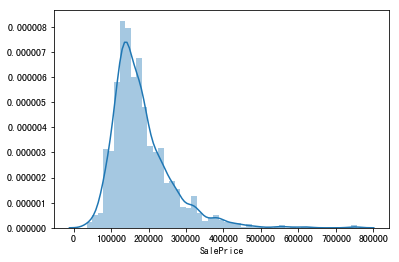

In [25]:
sns.distplot(train.SalePrice)

In [26]:
train.SalePrice.skew()

1.8828757597682129

In [27]:
train.SalePrice.kurt()

6.536281860064529

In [28]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [29]:
train['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
5       1362
6       1694
7       2090
8       1774
9       1077
10      1040
11      2324
12       912
13      1494
14      1253
15       854
16      1004
17      1296
18      1114
19      1339
20      2376
21      1108
22      1795
23      1060
24      1060
25      1600
26       900
27      1704
28      1600
29       520
        ... 
1430    1838
1431     958
1432     968
1433    1792
1434    1126
1435    1537
1436     864
1437    1932
1438    1236
1439    1725
1440    2555
1441     848
1442    2007
1443     952
1444    1422
1445     913
1446    1188
1447    2090
1448    1346
1449     630
1450    1792
1451    1578
1452    1072
1453    1140
1454    1221
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [30]:
var = 'GrLivArea'

In [31]:
data = pd.concat([train['SalePrice'], train[var]], axis=1)

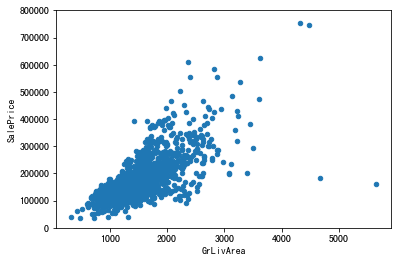

In [32]:
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

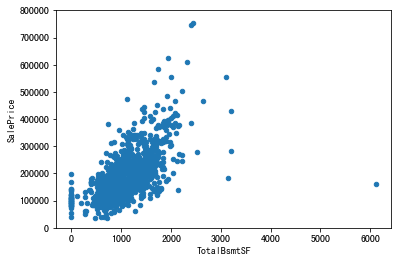

In [33]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

(-0.5, 9.5, 0, 800000)

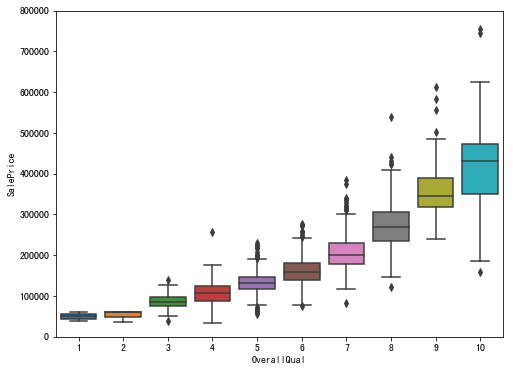

In [34]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

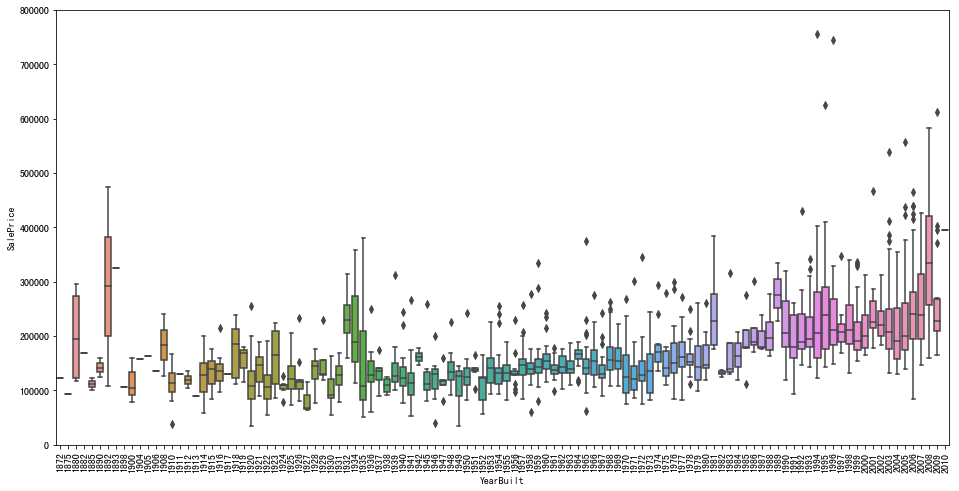

In [35]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

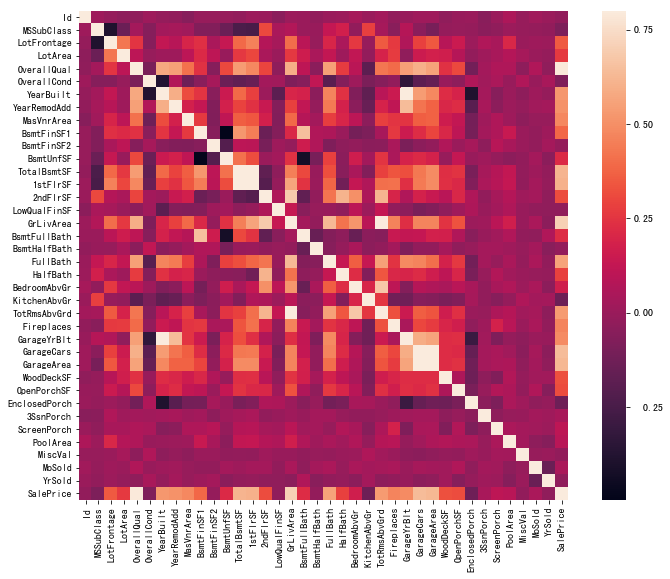

In [36]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

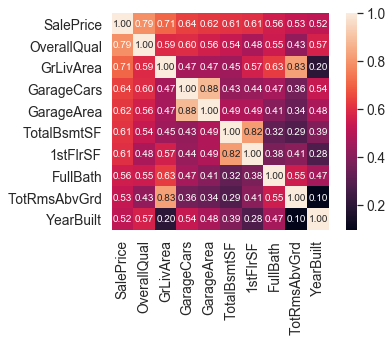

In [37]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


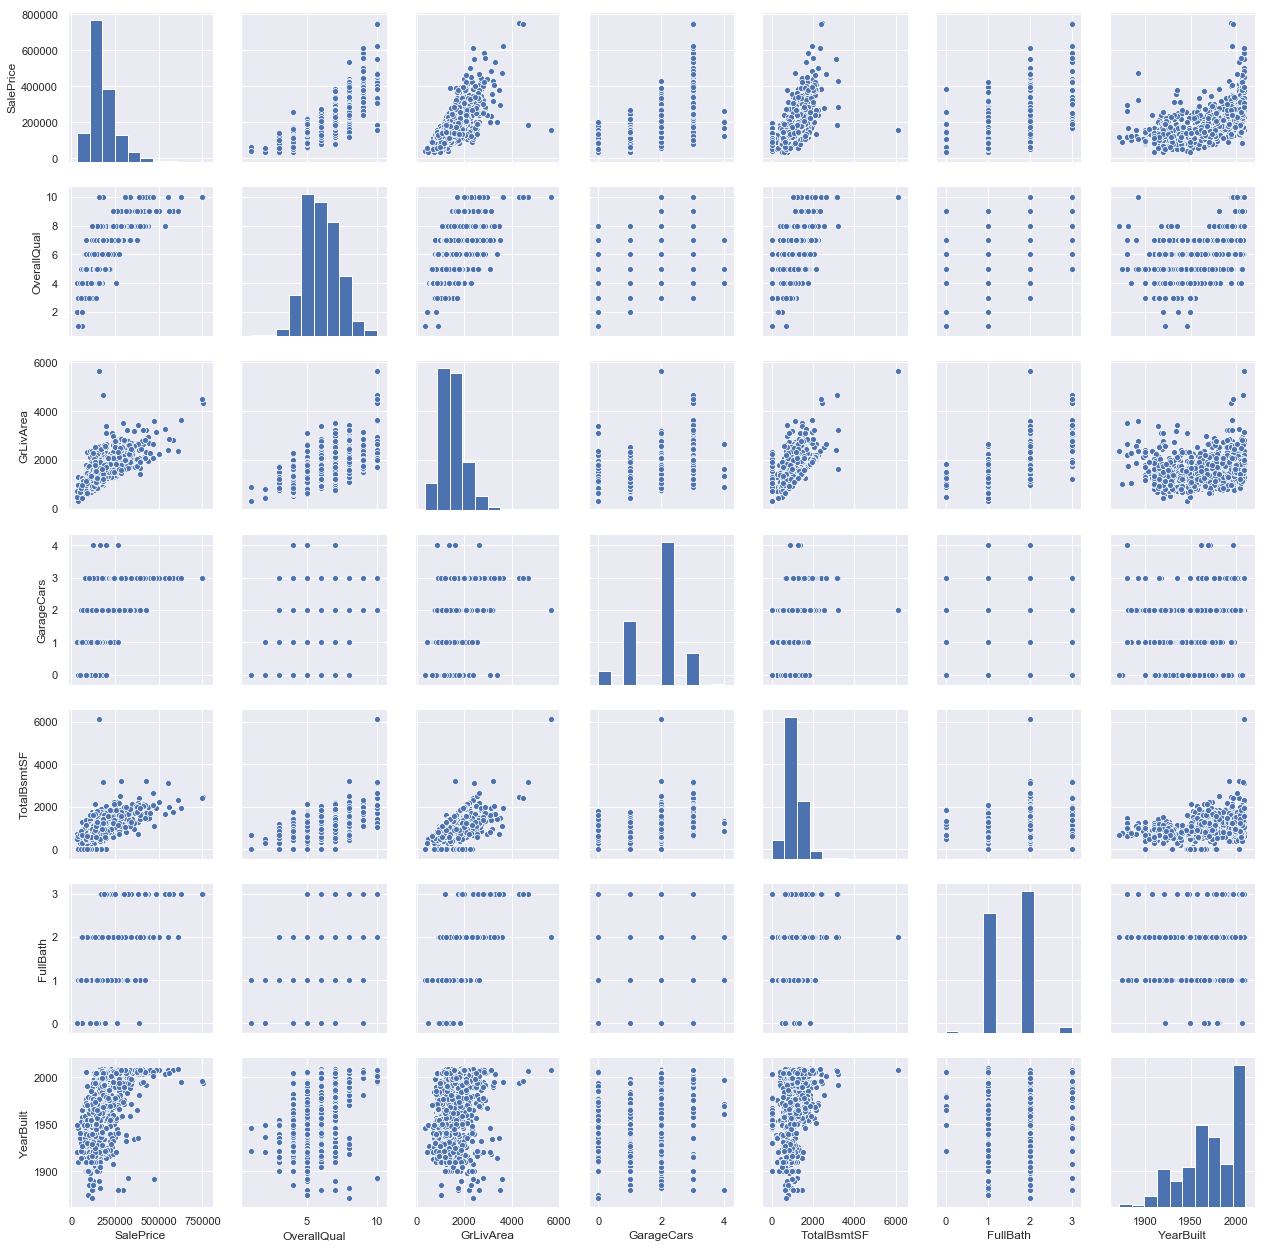

In [38]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 
        'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

In [39]:
pwd

'/Users/wangjian/Kaggle-Comp/housing'

In [42]:
total = train.isnull().sum().sort_values(ascending=False)

In [52]:
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

In [55]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [58]:
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [62]:
train = train.drop((missing_data[missing_data['Total']>1]).index, 1)

In [65]:
train = train.drop(train.loc[train['Electrical'].isnull()].index)

In [67]:
train.isnull().sum().max()

0

In [69]:
StandardScaler().fit_transform()

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [70]:
np.newaxis

In [74]:
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:, np.newaxis])

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [75]:
saleprice_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [85]:
low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]

In [86]:
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]

In [87]:
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


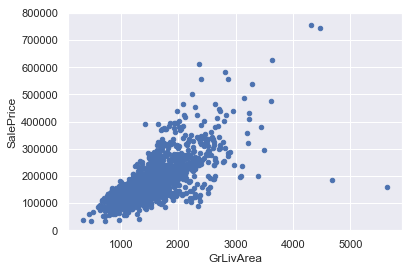

In [88]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

In [100]:
train.sort_values(by='GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1298,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,523,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [99]:
train = train.drop(train[train['Id']==1299].index)

In [101]:
train = train.drop(train[train['Id']==523].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


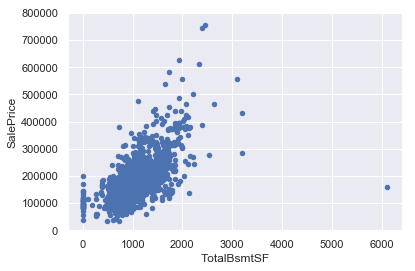

In [103]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

In [105]:
train.sort_values(by='TotalBsmtSF', ascending = False)[:1]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1298,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


In [106]:
train = train.drop(train[train['Id']==1298].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


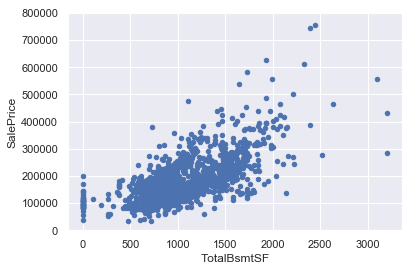

In [107]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))